 # 베이지안 머신러닝

###  박태영 교수
### 연세대학교 응용통계학과

### Outline

### 5. 나이브 베이즈 (1)
    5.1 가우시안 나이브 베이즈
    5.2 베르누이 나이브 베이즈

#### 5.1 가우시안 나이브 베이즈

- `K`개의 범주(`th`)가 존재
- 범주를 분류하기 위한 `N`개의 특성(`X`)이 각각 **연속형 변수**임
- 필요한 모듈을 설치

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

- 고객 데이터
- 단골(regular)고객을 구매금액(`sal_amt`)과 할인금액(`dc_amt`)으로 분류 

In [2]:
customer = pd.read_csv('Customer.csv')
customer.head()

,cs_id,prd_cd,sex_cd,age,sal_amt,dc_amt,sal_freq
0,1,AB,F,25.0,82600.0,6260.0,4.0
1,2,AC,M,26.0,84400.0,11100.0,6.0
2,3,AB,F,28.0,103600.0,10660.0,5.0
3,4,AD,M,26.0,67200.0,9300.0,4.0
4,5,AC,F,22.0,65300.0,4230.0,3.0


- 단골고객을 구매빈도(`sal_freq`)가 10회 이상인 고객으로 정의

In [3]:
customer['reg'] = (customer['sal_freq']>=10.0).astype('int')

In [4]:
th = customer['reg']
X  = customer[['sal_amt','dc_amt']]

- 데이터의 70%를 훈련용(`train`)으로 사용하고 나머지 30%를 테스트용(`test`)으로 사용하기 위해 분리
- `stratify=th`를 사용하여 훈련용 데이터와 테스트용 데이터의 `th` 비율이 동일하게 함 

In [5]:
X_train, X_test, th_train, th_test = train_test_split(X, th, test_size=0.3, random_state=1, stratify=th)

In [6]:
print('Labels counts in th:', np.bincount(th))
print('Labels counts in th_train:', np.bincount(th_train))
print('Labels counts in th_test:', np.bincount(th_test))

Labels counts in th: [672 328]
Labels counts in th_train: [470 230]
Labels counts in th_test: [202  98]


- 훈련용 데이터의 `X_train`를 표준화 (평균이 0, 표준편차가 1)
- 표준화를 통해 학습의 안전성과 속도를 높임

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(X_train) # training data의 X에 대한 평균과 표준편차를 계산

X_train_std = sc.transform(X_train) # 표준화
X_test_std  = sc.transform(X_test) # 표준화

X_combined_std = np.vstack((X_train_std, X_test_std)) # 전체 데이터
th_combined = np.hstack((th_train, th_test)) # 전체 데이터

In [8]:
print(np.mean(X_train_std), np.std(X_train_std))

3.1086244689504386e-17 1.0


In [9]:
print(np.mean(X_test_std), np.std(X_test_std))

0.0618257914460383 0.9555089619192767


- 훈련용 데이터에 가우시안 나이브 베이즈 학습

In [10]:
gnb = GaussianNB()
gnb.fit(X_train_std, th_train)

GaussianNB()

- 테스트용 데이터에 가우시안 나이브 베이즈 성능 측정

In [11]:
th_pred = gnb.predict(X_test_std)
confusion_matrix(th_test, th_pred)

array([[182,  20],
       [ 16,  82]], dtype=int64)

In [12]:
print('Misclassified samples: %d' % (th_test != th_pred).sum())

Misclassified samples: 36


In [13]:
print('Accuracy: %.2f' % accuracy_score(th_test, th_pred))

Accuracy: 0.88


- 결정 경계(decision boundary) 시각화

In [14]:
!pip install --upgrade pip
!pip install mlxtend

- `mlxtend` 라이브러리를 설치한 뒤에 결정 경계 시각화에서 에러가 나면 아래 두 줄의 코드를 차례대로 실행

In [15]:
conda install mlxtend --channel conda-forge

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\jaeyeon\anaconda3

  added / updated specs:
    - mlxtend


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.7.22  |       h56e8100_0         146 KB  conda-forge
    certifi-2023.7.22          |     pyhd8ed1ab_0         150 KB  conda-forge
    conda-23.7.4               |  py311h1ea47a8_0         1.3 MB  conda-forge
    cryptography-38.0.4        |  py311hca2b3cc_0         1.0 MB  conda-forge
    mlxtend-0.23.0             |     pyhd8ed1ab_0         1.3 MB  conda-forge
    openssl-1.1.1w             |       hcfcfb64_0         5.0 MB  conda-forge
    python_abi-3.11            |          2_cp311           5 KB  conda-forge
    ucrt-10.0.22621.0          |       h57928b3_0         1.2 MB  conda-forge
    vc14_runtime-14.36.32532   |      hdcecf7f_17         722 KB  conda-forge


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/win-64/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 200 None
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pk

In [16]:
conda install -c conda-forge mlxtend

^C

Note: you may need to restart the kernel to use updated packages.


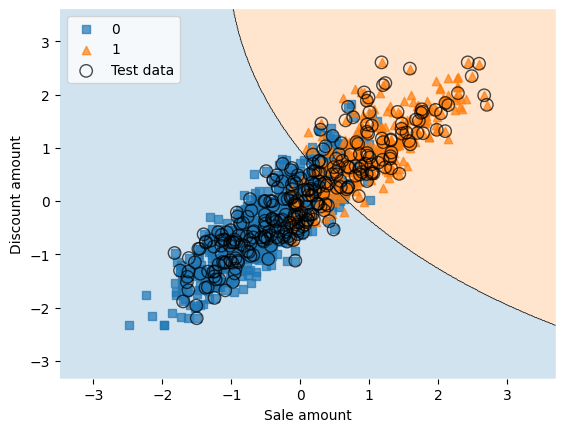

In [27]:
import matplotlib.pyplot as plt    
from IPython.display import Image
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings(action='ignore')

scatter_kwargs = {'edgecolor': None, 'alpha': 0.7}
contourf_kwargs = {'alpha': 0.2}
scatter_highlight_kwargs = {'label': 'Test data', 'alpha': 0.7}

plot_decision_regions(X_combined_std, th_combined, clf=gnb, X_highlight=X_test_std,
                      scatter_kwargs=scatter_kwargs,
                      contourf_kwargs=contourf_kwargs,
                      scatter_highlight_kwargs=scatter_highlight_kwargs)
plt.xlabel('Sale amount')
plt.ylabel('Discount amount')
plt.legend(loc='upper left')
plt.savefig('GNB.png', dpi=300)
plt.show()

#### 5.2 베르누이 나이브 베이즈

- `K`개의 범주(`th`)가 존재
- 범주를 분류하기 위한 `N`개의 특성(`X`)이 각각 **불리언 변수**임

In [28]:
X = customer.drop('reg',axis=1)
X_bool = X.copy()
X_bool['sal_avg'] = X_bool['sal_amt']/X_bool['sal_freq'] # 1회 방문시 평균 구매금액 

- `quantile_group`: 연속형 변수를 분위수로 범주화하여 범주형 변수를 만드는 함수
- `pd.qcut`: 분위수로 나눔, `q=4`일 때 사분위수(25%:25%:25%:25%)로 나눔

In [29]:
def quantile_group(df,columns,q=4): # 사분위수로 나눔
    for col in columns:
        df['G_'+str(col)] = pd.qcut(df[col], q=q, labels=['q'+str(i) for i in range(1,q+1)]) 
        df.drop(col,axis=1,inplace=True)
    return df

- `OH_encode`: 범주형 변수를 원핫 인코딩(one-hot encoding)한 변수로 만드는 함수
- `pd.get_dummies`: 원핫 인코딩을 하는 함수
- `drop_first=False`로 할 경우, `N`개의 범주를 `N`개의 변수로 원핫 인코딩 (`True`일 경우 `N-1`개로 원핫 인코딩)

In [30]:
def OH_encode(df,drop_first):
    df = quantile_group(df,['age','sal_avg','dc_amt']) # 연속형 변수들
    df = df[['prd_cd','sex_cd','G_age','G_sal_avg','G_dc_amt']]
    df = df.astype('object')
    df = pd.get_dummies(df, drop_first=drop_first)
    return df

In [31]:
X_bool = OH_encode(X_bool,drop_first=False)
X_bool.head()

,prd_cd_AA,prd_cd_AB,prd_cd_AC,prd_cd_AD,prd_cd_AE,sex_cd_F,sex_cd_M,G_age_q1,G_age_q2,G_age_q3,G_age_q4,G_sal_avg_q1,G_sal_avg_q2,G_sal_avg_q3,G_sal_avg_q4,G_dc_amt_q1,G_dc_amt_q2,G_dc_amt_q3,G_dc_amt_q4
0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0
1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0
3,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0
4,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0


- 데이터의 70%를 훈련용(`train`)으로 사용하고 나머지 30%를 테스트용(`test`)으로 사용하기 위해 분리
- `stratify=th`를 사용하여 훈련용 데이터와 테스트용 데이터의 `th` 비율이 동일하게 함 

In [32]:
X_train, X_test, th_train, th_test = train_test_split(X_bool, th, test_size=0.3, random_state=1, stratify=th)

- 훈련용 데이터에 베르누이 나이브 베이즈 학습

In [33]:
bnb = BernoulliNB()
bnb.fit(X_train, th_train)

BernoulliNB()

- 테스트용 데이터에 베르누이 나이브 베이즈 성능 측정

In [34]:
th_pred = bnb.predict(X_test)
confusion_matrix(th_test, th_pred)

array([[178,  24],
       [ 15,  83]], dtype=int64)

In [35]:
print('Misclassified samples: %d' % (th_test != th_pred).sum())

Misclassified samples: 39


In [26]:
print('Accuracy: %.2f' % accuracy_score(th_test, th_pred))

Accuracy: 0.87
